<a href="https://colab.research.google.com/github/CVH4OYC/ML_lab/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter — это онлайн-платформа социальных сетей, где люди делятся своими мыслями в виде твитов. Замечено, что некоторые люди злоупотребляют ею, чтобы твитнуть оскорбительный контент. Twitter пытается решить эту проблему, и мы поможем ему, создав сильную модель классификатора на основе NLP, чтобы различать негативные твиты и блокировать такие твиты. Можете ли вы построить сильную модель классификатора, чтобы предсказывать то же самое?

Каждая строка содержит текст твита и метку настроения. В обучающем наборе вам предоставляется слово или фраза, взятые из твита (selected_text), которые инкапсулируют предоставленное настроение.

При анализе CSV-файла обязательно удалите начальные и конечные кавычки из текстового поля, чтобы гарантировать, что вы не включите их в свое обучение.

Вы пытаетесь предсказать слово или фразу из твита, которая иллюстрирует указанное мнение. Слово или фраза должны включать все символы в этом диапазоне (т.е. включая запятые, пробелы и т.д.)

Столбцы:
textID - уникальный идентификатор для каждого фрагмента текста

текст - текст твита

настроение - общее настроение твита

Набор данных можно загрузить с Kaggle Competetions:
https://www.kaggle.com/c/tweet-sentiment-extraction/data?select=train.csv

Цель:
Понимание набора данных и очистка (при необходимости).
Постройте модели классификации для прогнозирования настроений в Twitter.
Сравните показатели оценки различных алгоритмов классификации.

In [1]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

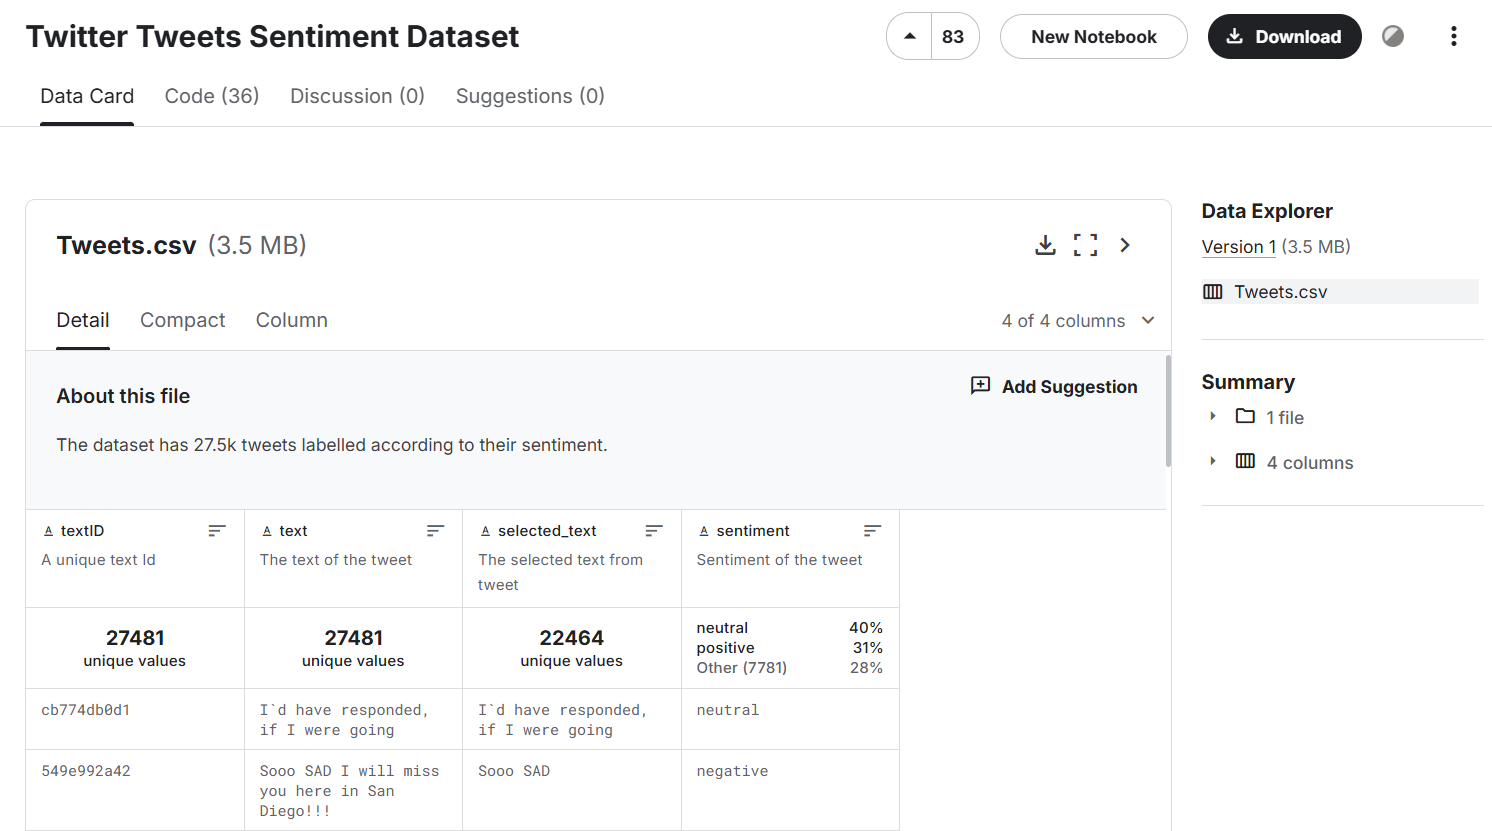

In [2]:
import pandas as pd

# Указание пути к файлу
file_path = "/content/Tweets.csv"
# Чтение файла
df = pd.read_csv(file_path)
# Проверка данных
print(df.head())
# Размер датасета
print("Размер датасета:", df.shape)
# Типы данных
print("\nТипы данных:")
print(df.dtypes)
# Обзор пропущенных значений
print("\nПропущенные значения:")
print(df.isnull().sum())
# Общая информация о датасете
print("\nОбщая информация:")
print(df.info())


       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
Размер датасета: (27481, 4)

Типы данных:
textID           object
text             object
selected_text    object
sentiment        object
dtype: object

Пропущенные значения:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

Общая информация:
<c

In [3]:
# Удаление строк с пропусками
df = df.dropna()
# Проверка пропусков после обработки
print(df.isnull().sum())


textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


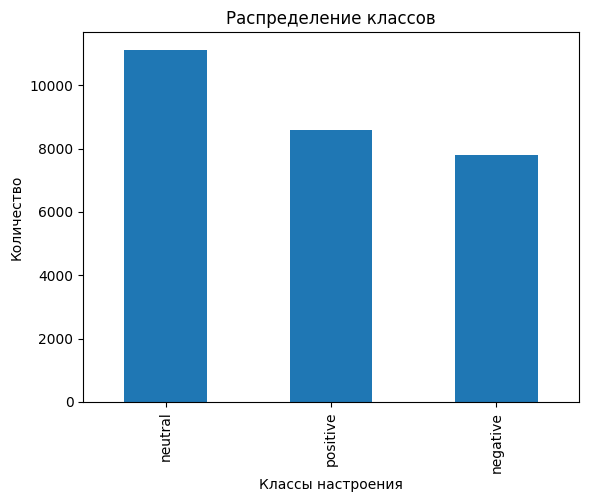

In [4]:
# Распределение классов
print(df['sentiment'].value_counts())

# Визуализация
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='bar', title='Распределение классов')
plt.xlabel('Классы настроения')
plt.ylabel('Количество')
plt.show()


In [5]:
import pandas as pd
import re

# Функция для очистки текста
def standardize_text(df, text_field):
    def clean(text):
        text = re.sub(r"http\S+|http", "", text)  # Удаление ссылок
        text = re.sub(r"@\S+", "", text)         # Удаление упоминаний
        text = re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", text)  # Удаление лишних символов
        text = text.replace("@", "at").lower()   # Приведение текста к нижнему регистру
        return text

    # Применение очистки ко всем строкам в указанном столбце
    df[text_field] = df[text_field].apply(lambda x: clean(str(x)))
    return df

# Загрузка данных
file_path = "/content/Tweets.csv"  # Укажите путь к вашему файлу
questions = pd.read_csv(file_path)

# Очистка текста
questions = standardize_text(questions, "text")
questions = standardize_text(questions, "selected_text")

# Сохранение очищенных данных
cleaned_file_path = "clean_data.csv"
questions.to_csv(cleaned_file_path, index=False)

print(f"Очищенные данные сохранены в {cleaned_file_path}")


Очищенные данные сохранены в clean_data.csv


In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Создание экземпляра OrdinalEncoder
encoder = OrdinalEncoder()

# Преобразование категориального столбца sentiment в числовой формат
questions["sentiment"] = encoder.fit_transform(questions[["sentiment"]]).astype(int)

# Проверка преобразования
print(questions.head())


       textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me      
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of     , why couldn`t they put them on t...   

                         selected_text  sentiment  
0  i`d have responded, if i were going          1  
1                             sooo sad          0  
2                          bullying me          0  
3                       leave me alone          0  
4                        sons of     ,          0  


In [7]:
# Вывод категорий и их соответствий
categories = encoder.categories_[0]
for i, category in enumerate(categories):
    print(f"{category} -> {i}")


negative -> 0
neutral -> 1
positive -> 2


In [8]:
questions.groupby("sentiment").count()


,textID,text,selected_text
sentiment,,,
0,7781,7781,7781
1,11118,11118,11118
2,8582,8582,8582


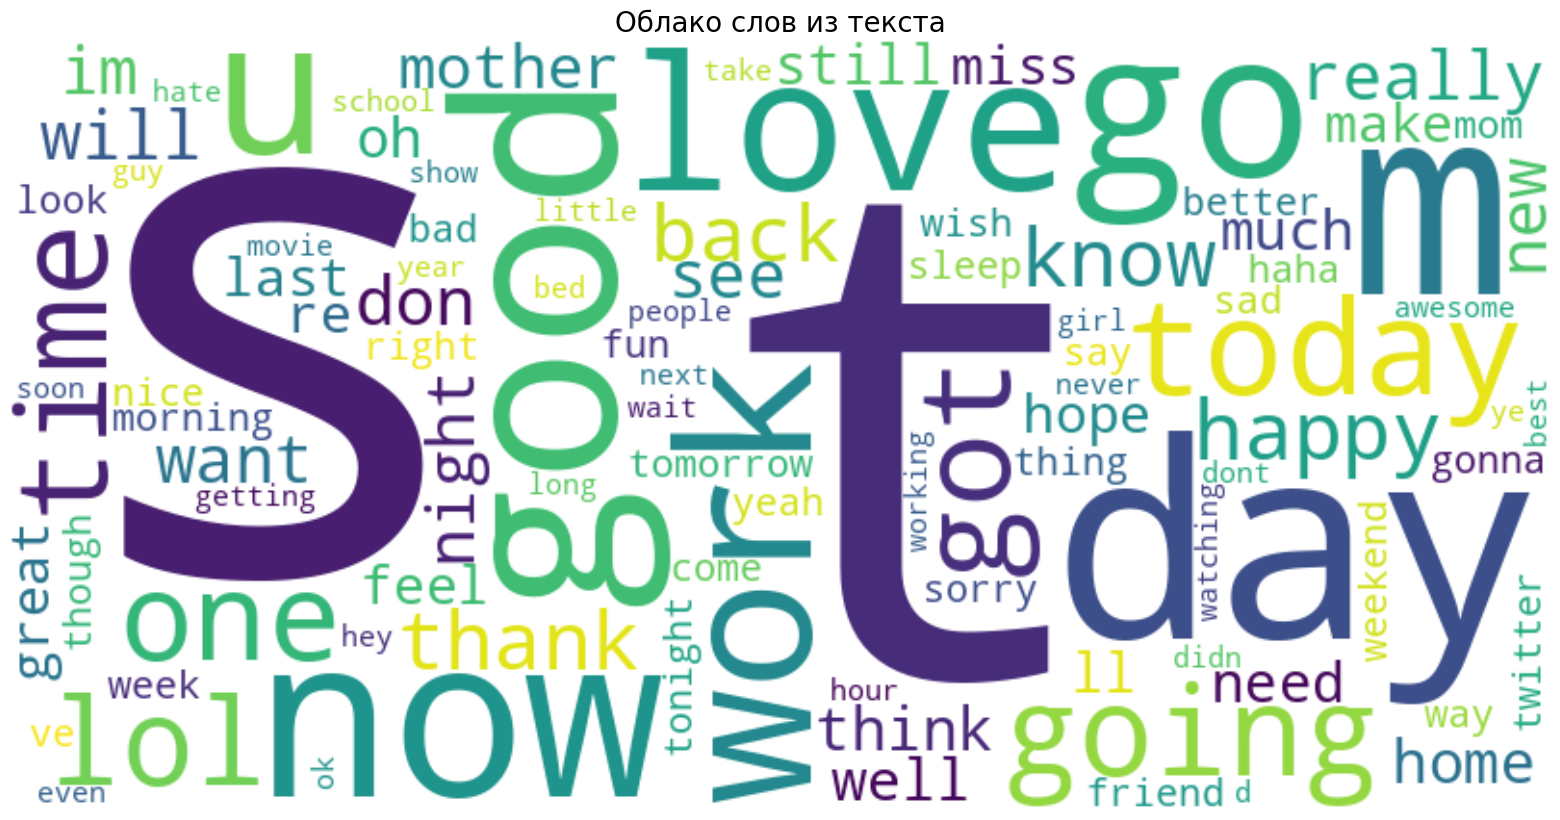

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Объединяем весь текст из столбца "text" в одну строку
all_text = " ".join(questions["text"].astype(str))

# Генерация облака слов
wordcloud = WordCloud(max_words=100, background_color='white',
                      width=800, height=400, collocations=False).generate(all_text)

# Отображение облака слов
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title("Облако слов из текста", fontsize=20)
plt.show()


In [10]:
from nltk.tokenize import RegexpTokenizer

# Создание токенизатора
tokenizer = RegexpTokenizer(r'\w+')

# Применение токенизации к тексту
questions["tokens"] = questions["text"].apply(tokenizer.tokenize)

# Проверка результата
print(questions.head())


       textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me      
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of     , why couldn`t they put them on t...   

                         selected_text  sentiment  \
0  i`d have responded, if i were going          1   
1                             sooo sad          0   
2                          bullying me          0   
3                       leave me alone          0   
4                        sons of     ,          0   

                                              tokens  
0        [i, d, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bullying, me]  
3                [what, interview, leave, me, alone]

363306 слов всего, словарный запас состоит 25033 слов
Максимальная длина предложения 37 слов


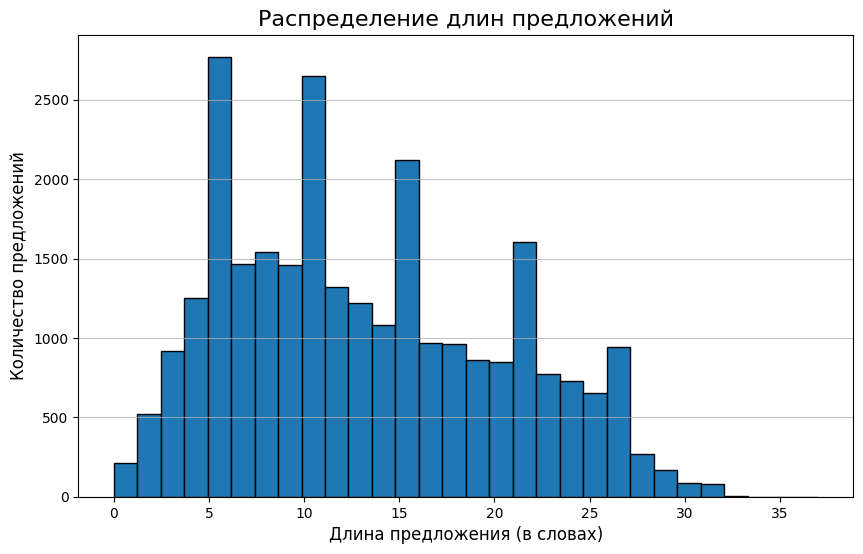

In [11]:
# Список всех слов из токенов
all_words = [word for tokens in questions["tokens"] for word in tokens]

# Список длины каждого предложения
sentence_lengths = [len(tokens) for tokens in questions["tokens"]]

# Уникальные слова в тексте (словарный запас)
VOCAB = sorted(list(set(all_words)))

# Вывод статистики
print("%s слов всего, словарный запас состоит %s слов" % (len(all_words), len(VOCAB)))
print("Максимальная длина предложения %s слов" % max(sentence_lengths))

# Построение гистограммы
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, edgecolor='black')
plt.title("Распределение длин предложений", fontsize=16)
plt.xlabel("Длина предложения (в словах)", fontsize=12)
plt.ylabel("Количество предложений", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Функция для Bag of Words
def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

# Преобразование данных
list_corpus = questions["text"].tolist()  # Список текстов
list_labels = questions["sentiment"].tolist()  # Список меток

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    list_corpus, list_labels, test_size=0.2, random_state=40
)

# Преобразование текста в числовое представление
X_train_counts, count_vectorizer = cv(X_train)  # Bag of Words для тренировочного набора
X_test_counts = count_vectorizer.transform(X_test)  # Для тестового набора

# Проверка размеров данных
print(f"Размер тренировочного набора: {X_train_counts.shape}")
print(f"Размер тестового набора: {X_test_counts.shape}")


Размер тренировочного набора: (21984, 21859)
Размер тестового набора: (5497, 21859)


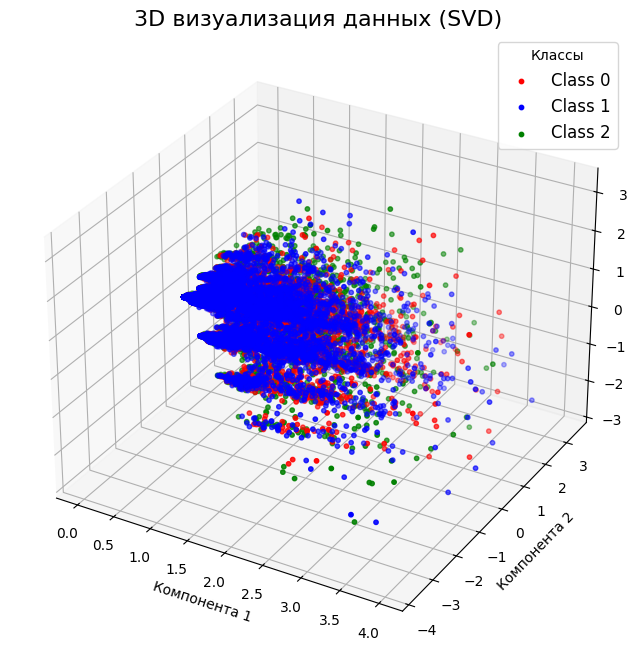

In [19]:
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3D_SVD(data, labels):
    svd = TruncatedSVD(n_components=3)
    reduced_data = svd.fit_transform(data)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Цвета для классов
    colors = ['red', 'blue', 'green']
    for label in set(labels):
        points = reduced_data[[i for i in range(len(labels)) if labels[i] == label]]
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=10, label=f'Class {label}', color=colors[label])

    ax.set_title("3D визуализация данных (SVD)", fontsize=16)
    ax.set_xlabel("Компонента 1")
    ax.set_ylabel("Компонента 2")
    ax.set_zlabel("Компонента 3")
    plt.legend(title="Классы", fontsize=12)
    plt.show()

# Вызов функции
plot_3D_SVD(X_train_counts, y_train)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score

# Обучение логистической регрессии
clf = LogisticRegression(
    C=30.0,
    class_weight='balanced',
    solver='newton-cg',
    multi_class='multinomial',
    n_jobs=-1,
    random_state=40
)
clf.fit(X_train_counts, y_train)

# Предсказания
y_predicted_counts = clf.predict(X_test_counts)

# Функция для вычисления метрик
def get_metrics(y_test, y_predicted):
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    r2 = r2_score(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1, r2

# Вычисление метрик
accuracy, precision, recall, f1, r2 = get_metrics(y_test, y_predicted_counts)

# Вывод метрик
print(f"accuracy = {accuracy:.3f}, precision = {precision:.3f}, recall = {recall:.3f}, f1 = {f1:.3f}, r2 = {r2:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy = 0.658, precision = 0.657, recall = 0.658, f1 = 0.658, r2 = 0.220


Модель логистической регрессии показала точность 65.8% с одинаковыми значениями метрик Precision (Точность предсказания), Recall (Полнота) и F1, что указывает на сбалансированность работы модели. Однако R2 (Коэффициент детерминации) составляет всего 22% , что говорит о том, что модель объясняет лишь небольшую часть вариации данных, и её производительность ограничена. Результаты приемлемы для базовой модели, но для повышения точности и объяснительной способности следует рассмотреть улучшение данных (например, использование TF-IDF) или более сложные модели, такие как нейронные сети или ансамблевые методы.

Попытка использования другой модели - Рэндом Форест

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Обучение Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=40)
rf_clf.fit(X_train_counts, y_train)

# Предсказания
y_predicted_rf = rf_clf.predict(X_test_counts)

# Оценка метрик
accuracy_rf, precision_rf, recall_rf, f1_rf, r2_rf = get_metrics(y_test, y_predicted_rf)
print(f"accuracy = {accuracy_rf:.3f}, precision = {precision_rf:.3f}, recall = {recall_rf:.3f}, f1 = {f1_rf:.3f}, r2 = {r2_rf:.3f}")


accuracy = 0.690, precision = 0.707, recall = 0.690, f1 = 0.689, r2 = 0.353


Попытка использования TF-IDF векторизацию для того, чтобы:
1. Преобразовать текста в числовую форму:

    Машинное обучение и нейронные сети не могут работать напрямую с текстом.
    TF-IDF преобразует текст в матрицу чисел, где каждая строка — это документ, а столбцы — это веса слов.

2. Выделить важные слова:

    TF-IDF помогает выявить слова, которые уникально характеризуют документ.
    Например, в тексте о программировании слово python будет иметь больший вес, чем часто встречающиеся слова, такие как the или and.

3. Улучшить качество модели:

    TF-IDF снижает влияние часто встречающихся, но незначительных слов (например, предлогов или союзов).
    Это помогает модели сфокусироваться на действительно значимых признаках.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF векторизация текста
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Создание матрицы TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(questions["text"])

# Разделение на тренировочную и тестовую выборки
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    X_tfidf, questions["sentiment"], test_size=0.2, random_state=40
)

print(f"Размеры TF-IDF матрицы: {X_train_tfidf.shape}, {X_test_tfidf.shape}")


Размеры TF-IDF матрицы: (21984, 10000), (5497, 10000)


In [38]:
import numpy as np

# Добавление длины текста как признака
questions["text_length"] = questions["text"].apply(len)

# Добавление количества восклицательных знаков
questions["exclamation_count"] = questions["text"].apply(lambda x: x.count("!"))

# Добавление количества слов
questions["word_count"] = questions["text"].apply(lambda x: len(x.split()))

# Преобразование новых признаков в массив
additional_features = questions[["text_length", "exclamation_count", "word_count"]].values

# Разделение на тренировочные и тестовые дополнительные признаки
X_train_add, X_test_add = train_test_split(
    additional_features, test_size=0.2, random_state=40
)

print(f"Размер дополнительных признаков: {X_train_add.shape}, {X_test_add.shape}")


Размер дополнительных признаков: (21984, 3), (5497, 3)


In [39]:
from scipy.sparse import hstack

# Объединение TF-IDF и дополнительных признаков
X_train_combined = hstack([X_train_tfidf, X_train_add])
X_test_combined = hstack([X_test_tfidf, X_test_add])

print(f"Размер объединённых данных: {X_train_combined.shape}, {X_test_combined.shape}")


Размер объединённых данных: (21984, 10003), (5497, 10003)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Обучение Random Forest на объединённых данных
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=40)
rf_clf.fit(X_train_combined, y_train)

# Предсказания
y_predicted_rf = rf_clf.predict(X_test_combined)

# Оценка метрик
accuracy_rf, precision_rf, recall_rf, f1_rf, r2_rf = get_metrics(y_test, y_predicted_rf)
print(f"accuracy = {accuracy_rf:.3f}, precision = {precision_rf:.3f}, recall = {recall_rf:.3f}, f1 = {f1_rf:.3f}, r2 = {r2_rf:.3f}")


accuracy = 0.683, precision = 0.692, recall = 0.683, f1 = 0.681, r2 = 0.309


In [46]:
questions = questions.drop(columns=["text_length", "exclamation_count", "word_count"], errors="ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# CountVectorizer вместо TF-IDF
count_vectorizer = CountVectorizer(max_features=10000, stop_words='english')
X_count = count_vectorizer.fit_transform(questions["text"])

# Разделение на тренировочную и тестовую выборки
X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, questions["sentiment"], test_size=0.2, random_state=40
)

print(f"Размеры CountVectorizer матрицы: {X_train_count.shape}, {X_test_count.shape}")
del X_tfidf, X_train_tfidf, X_test_tfidf, X_train_add, X_test_add, X_train_combined, X_test_combined
print(questions.head())


Размеры CountVectorizer матрицы: (21984, 10000), (5497, 10000)
       textID                                               text  \
0  cb774db0d1                i`d have responded, if i were going   
1  549e992a42      sooo sad i will miss you here in san diego!!!   
2  088c60f138                          my boss is bullying me      
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   sons of     , why couldn`t they put them on t...   

                         selected_text  sentiment  \
0  i`d have responded, if i were going          1   
1                             sooo sad          0   
2                          bullying me          0   
3                       leave me alone          0   
4                        sons of     ,          0   

                                              tokens  
0        [i, d, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bully

Функция для построения матрицы ошибок

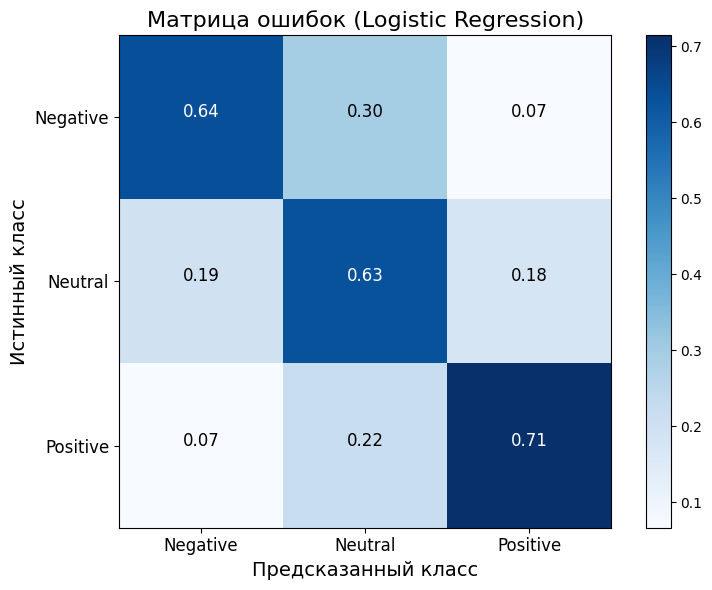

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения матрицы ошибок
def plot_confusion_matrix(cm, class_labels, title='Матрица ошибок', cmap=plt.cm.Blues, normalize=False):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, fontsize=12)
    plt.yticks(tick_marks, class_labels, fontsize=12)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt), ha="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=12)

    plt.ylabel('Истинный класс', fontsize=14)
    plt.xlabel('Предсказанный класс', fontsize=14)
    plt.tight_layout()

# Построение матрицы ошибок
class_labels = ["Negative", "Neutral", "Positive"]
cm = confusion_matrix(y_test, y_predicted_counts)

# Визуализация
plot_confusion_matrix(cm, class_labels, title='Матрица ошибок (Logistic Regression)', normalize=True)
plt.show()


Матрица ошибок показывает, как модель предсказывает каждый класс в сравнении с истинными метками. Основные выводы из нормализованной матрицы:

    Класс Negative:
        Модель правильно предсказывает 64% (0.64) негативных твитов.
        Ошибочно классифицирует 30% (0.30) как нейтральные и 7% (0.07) как позитивные.

    Класс Neutral:
        Модель хорошо справляется с классификацией нейтральных твитов, верно определяя 63% (0.63) из них.
        Однако 19% (0.19) классифицируются как негативные и 18% (0.18) как позитивные.

    Класс Positive:
        71% (0.71) позитивных твитов классифицируются правильно.
        Однако 22% (0.22) ошибочно отнесены к нейтральным, и 7% (0.07) — к негативным.

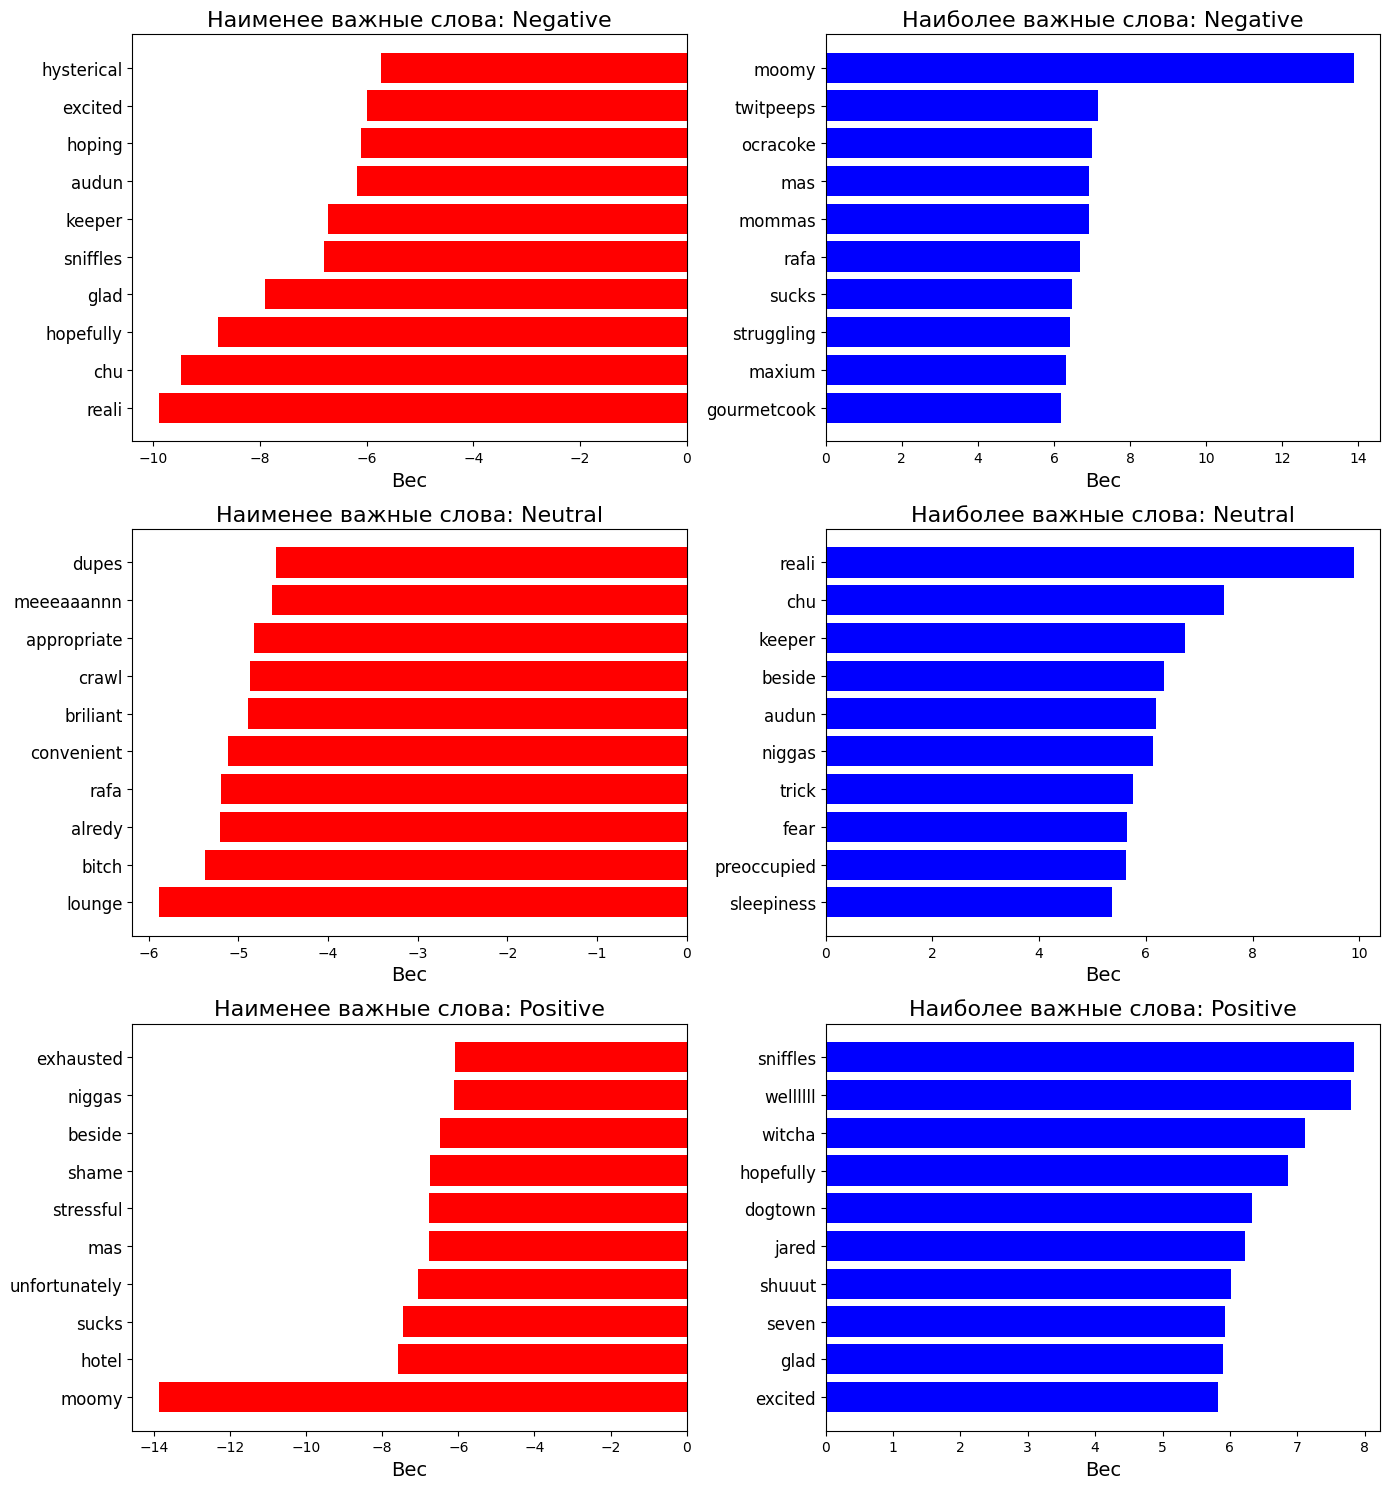

In [26]:
# Анализ важных и неважных слов
def get_most_important_features(vectorizer, model, n=10):
    """
    Функция для извлечения топ-N наиболее важных и наименее важных слов.
    """
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}
    classes = {}

    for class_index in range(model.coef_.shape[0]):  # Для каждого класса
        word_importances = [(coef, index_to_word[i]) for i, coef in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key=lambda x: x[0], reverse=True)

        tops = sorted_coeff[:n]
        bottoms = sorted_coeff[-n:]
        classes[class_index] = {"tops": tops, "bottoms": bottoms}

    return classes


def plot_important_words_multi(importance, class_labels):
    """
    Функция для визуализации наиболее важных и наименее важных слов.
    """
    num_classes = len(class_labels)
    fig, axes = plt.subplots(num_classes, 2, figsize=(14, 5 * num_classes))

    for class_index, label in enumerate(class_labels):
        # Извлекаем важные и неважные слова
        top_words = [word for _, word in importance[class_index]["tops"]]
        top_scores = [score for score, _ in importance[class_index]["tops"]]
        bottom_words = [word for _, word in importance[class_index]["bottoms"]]
        bottom_scores = [score for score, _ in importance[class_index]["bottoms"]]

        # Подготовка данных для графиков
        y_pos_top = np.arange(len(top_words))
        y_pos_bottom = np.arange(len(bottom_words))

        # График наименее важных слов
        axes[class_index, 0].barh(y_pos_bottom, bottom_scores, color="red", align="center")
        axes[class_index, 0].set_yticks(y_pos_bottom)
        axes[class_index, 0].set_yticklabels(bottom_words, fontsize=12)
        axes[class_index, 0].invert_yaxis()
        axes[class_index, 0].set_title(f"Наименее важные слова: {label}", fontsize=16)
        axes[class_index, 0].set_xlabel("Вес", fontsize=14)

        # График наиболее важных слов
        axes[class_index, 1].barh(y_pos_top, top_scores, color="blue", align="center")
        axes[class_index, 1].set_yticks(y_pos_top)
        axes[class_index, 1].set_yticklabels(top_words, fontsize=12)
        axes[class_index, 1].invert_yaxis()
        axes[class_index, 1].set_title(f"Наиболее важные слова: {label}", fontsize=16)
        axes[class_index, 1].set_xlabel("Вес", fontsize=14)

    plt.tight_layout()
    plt.show()


# Получение важных слов
importance = get_most_important_features(count_vectorizer, clf, n=10)

# Метки классов
class_labels = ["Negative", "Neutral", "Positive"]

# Построение графиков
plot_important_words_multi(importance, class_labels)


Функция для извлечения наиболее важных и наименее важных слов для каждой категории TF-IDF векторизации

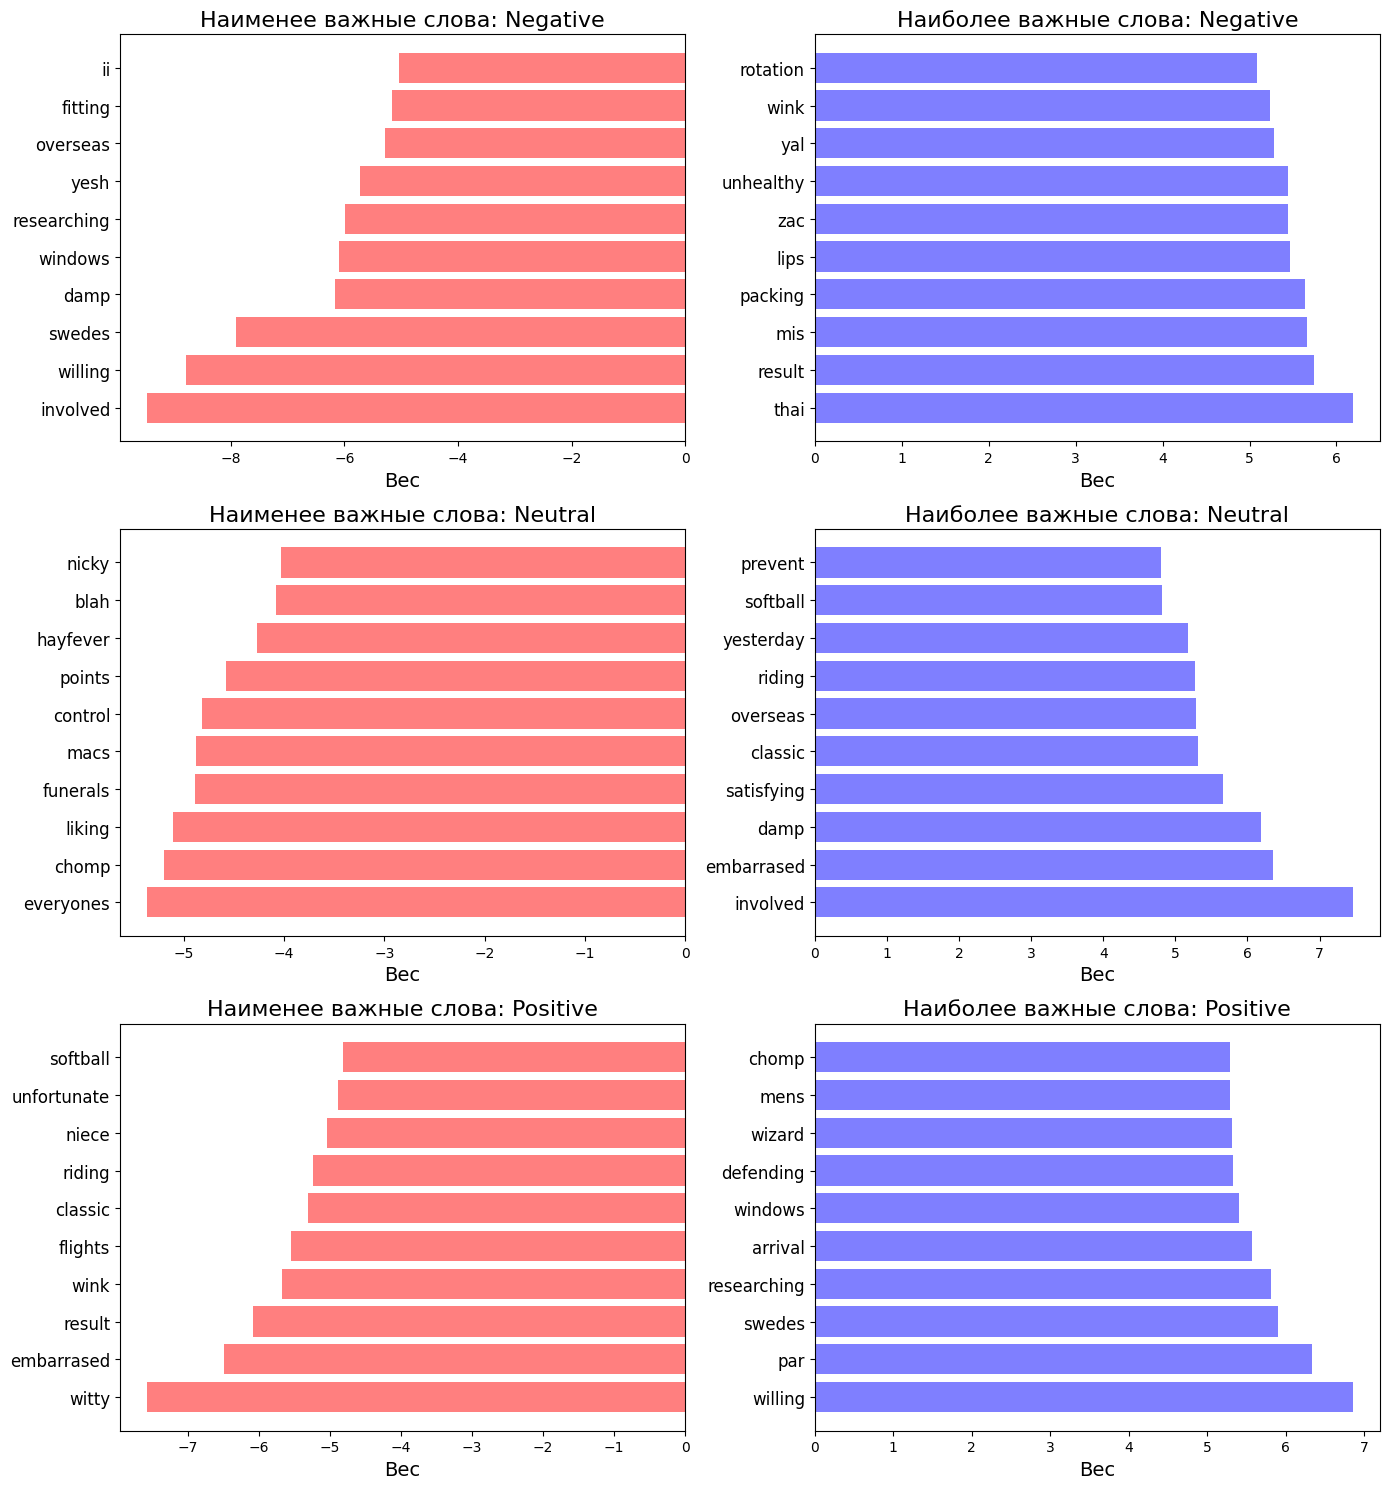

In [53]:
def get_most_important_features(vectorizer, model, n=5):
    """
    Функция для извлечения наиболее важных и наименее важных слов для каждой категории.
    """
    # Словарь для преобразования индексов в слова
    index_to_word = {v: k for k, v in vectorizer.vocabulary_.items()}

    classes = {}
    for class_index in range(model.coef_.shape[0]):  # Для каждого класса
        # Учитываем только те индексы, которые есть в словаре
        word_importances = [
            (coef, index_to_word[i]) for i, coef in enumerate(model.coef_[class_index]) if i in index_to_word
        ]
        # Сортируем слова по важности
        sorted_coeff = sorted(word_importances, key=lambda x: x[0], reverse=True)

        # Топ n важных и наименее важных слов
        tops = sorted(sorted_coeff[:n], key=lambda x: x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {"tops": tops, "bottom": bottom}
    return classes


def plot_important_words_multi(importance, class_labels, n=5):
    """
    Функция для визуализации наиболее важных и наименее важных слов.
    """
    num_classes = len(class_labels)
    fig, axes = plt.subplots(num_classes, 2, figsize=(14, 5 * num_classes))

    for class_index, label in enumerate(class_labels):
        # Извлекаем важные слова
        top_scores = [a[0] for a in importance[class_index]["tops"]]
        top_words = [a[1] for a in importance[class_index]["tops"]]
        bottom_scores = [a[0] for a in importance[class_index]["bottom"]]
        bottom_words = [a[1] for a in importance[class_index]["bottom"]]

        # Подготовка данных для графиков
        y_pos_top = np.arange(len(top_words))
        y_pos_bottom = np.arange(len(bottom_words))

        # Сортируем для лучшей визуализации
        top_pairs = sorted(zip(top_words, top_scores), key=lambda x: x[1])
        bottom_pairs = sorted(zip(bottom_words, bottom_scores), key=lambda x: x[1], reverse=True)

        top_words, top_scores = zip(*top_pairs)
        bottom_words, bottom_scores = zip(*bottom_pairs)

        # График наименее важных слов
        axes[class_index, 0].barh(y_pos_bottom, bottom_scores, align="center", alpha=0.5, color="red")
        axes[class_index, 0].set_yticks(y_pos_bottom)
        axes[class_index, 0].set_yticklabels(bottom_words, fontsize=12)
        axes[class_index, 0].invert_yaxis()
        axes[class_index, 0].set_title(f"Наименее важные слова: {label}", fontsize=16)
        axes[class_index, 0].set_xlabel("Вес", fontsize=14)

        # График наиболее важных слов
        axes[class_index, 1].barh(y_pos_top, top_scores, align="center", alpha=0.5, color="blue")
        axes[class_index, 1].set_yticks(y_pos_top)
        axes[class_index, 1].set_yticklabels(top_words, fontsize=12)
        axes[class_index, 1].invert_yaxis()
        axes[class_index, 1].set_title(f"Наиболее важные слова: {label}", fontsize=16)
        axes[class_index, 1].set_xlabel("Вес", fontsize=14)

    plt.tight_layout()
    plt.show()


# Получение важных слов и построение графиков
importance = get_most_important_features(count_vectorizer, clf, n=10)
class_labels = ["Negative", "Neutral", "Positive"]

plot_important_words_multi(importance, class_labels)


Явное ухудшение отображения наиболее важных слов

Проверка разметки данных, что, например, позитивные метки связаны с позитивным содержанием и т.д.

In [54]:
print(questions[questions['sentiment'] == 2].head(10))  # Для позитивных
print(questions[questions['sentiment'] == 1].head(10))  # Для нейтральных
print(questions[questions['sentiment'] == 0].head(10))  # Для негативных


        textID                                               text  \
6   6e0c6d75b1  2am feedings for the baby are fun when he is a...   
9   fc2cbefa9d   journey!? wow    u just became cooler   hehe ...   
11  16fab9f95b  i really really like the song love story by ta...   
21  e48b0b8a23  playing ghost online is really interesting  th...   
25  e00c6ef376  the free fillin` app on my ipod is fun, im add...   
28  6ce4a4954b  juss came backk from berkeleyy   omg its madd ...   
30  d33f811375  i`m going home now  have you seen my new twitt...   
31  7d8c4c11e4  i hope unni will make the audition   fighting ...   
33  2dc51711bc                     that`s very funny   cute kids    
39  2863f435bd  a little happy for the wine jeje ok it`sm my f...   

                                        selected_text  sentiment  \
6                                                 fun          2   
9                        wow    u just became cooler           2   
11                                  

In [58]:
from nltk.corpus import stopwords
from collections import Counter

# Загрузка стоп-слов
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Удаление стоп-слов
questions['tokens_filtered'] = questions['tokens'].apply(
    lambda tokens: [word for word in tokens if word not in stop_words]
)

# Функция для подсчёта частот слов по каждому классу
def get_top_words_by_class(data, class_label, n=10):
    # Фильтруем только строки с заданным классом
    class_tokens = data[data['sentiment'] == class_label]['tokens_filtered']

    # Объединяем все токены в один список
    all_tokens = [token for tokens in class_tokens for token in tokens]

    # Считаем частоты слов
    word_counts = Counter(all_tokens)

    # Возвращаем топ-N самых частых слов
    return word_counts.most_common(n)

# Вывод топ-слов для каждого класса
for sentiment, label in zip([0, 1, 2], ["Negative", "Neutral", "Positive"]):
    top_words = get_top_words_by_class(questions, sentiment, n=10)
    print(f"Топ-10 ключевых слов для класса '{label}':")
    for word, count in top_words:
        print(f"{word}: {count}")
    print()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Топ-10 ключевых слов для класса 'Negative':
like: 478
get: 436
miss: 425
go: 403
work: 403
sad: 397
im: 359
sorry: 352
really: 344
today: 340

Топ-10 ключевых слов для класса 'Neutral':
get: 627
go: 582
day: 525
lol: 499
work: 492
going: 483
got: 459
like: 457
today: 448
time: 433

Топ-10 ключевых слов для класса 'Positive':
day: 1259
good: 1066
love: 889
happy: 858
thanks: 567
great: 483
like: 418
hope: 411
mother: 374
get: 368



In [61]:
from collections import Counter

# Функция для нахождения уникальных топ-слов в каждом классе
def get_unique_top_words(data, sentiments, top_n=10):
    word_counts = {}
    for sentiment in sentiments:
        class_tokens = data[data['sentiment'] == sentiment]['tokens_filtered']
        all_tokens = [token for tokens in class_tokens for token in tokens]
        word_counts[sentiment] = Counter(all_tokens)

    # Находим уникальные слова для каждого класса
    unique_words = {}
    for sentiment in sentiments:
        # Слова текущего класса
        current_words = set(word_counts[sentiment].keys())
        # Слова остальных классов
        other_words = set()
        for other_sentiment in sentiments:
            if other_sentiment != sentiment:
                other_words |= set(word_counts[other_sentiment].keys())
        # Уникальные слова для текущего класса
        unique_words[sentiment] = current_words - other_words

    # Вывод уникальных топ-слов для каждого класса
    for sentiment, label in zip(sentiments, ["Negative", "Neutral", "Positive"]):
        print(f"\nУникальные топ-{top_n} слов для класса '{label}':")
        sentiment_unique_words = [
            (word, word_counts[sentiment][word])
            for word in unique_words[sentiment]
        ]
        # Сортируем по частоте и выводим топ-N
        top_unique_words = sorted(sentiment_unique_words, key=lambda x: x[1], reverse=True)[:top_n]
        for word, count in top_unique_words:
            print(f"{word}: {count}")

# Вызов функции
get_unique_top_words(questions, [0, 1, 2], top_n=10)



Уникальные топ-10 слов для класса 'Negative':
suffering: 9
saddest: 7
cramps: 7
allergic: 7
pissing: 7
devastated: 6
noes: 6
dealing: 6
sob: 6
hayfever: 5

Уникальные топ-10 слов для класса 'Neutral':
settings: 10
explain: 7
hiya: 6
mite: 6
lighter: 5
pfft: 5
lecture: 5
indoors: 5
guessed: 5
superstar: 5

Уникальные топ-10 слов для класса 'Positive':
congratulations: 29
thnx: 10
appreciated: 9
greetings: 7
shared: 7
presents: 7
blessings: 7
honored: 6
goood: 6
mothersday: 6


In [63]:
print(f"Размерность коэффициентов модели: {clf.coef_.shape}")
print(f"Размер словаря CountVectorizer: {len(count_vectorizer.vocabulary_)}")


Размерность коэффициентов модели: (3, 21859)
Размер словаря CountVectorizer: 10000


Поптыка вернуться к CountVectorizer

In [64]:
# Пересоздание CountVectorizer
count_vectorizer = CountVectorizer(
    stop_words='english',
    lowercase=True,
    max_features=10000  # Ограничение размера словаря
)

# Перевычисление векторизации
X_counts = count_vectorizer.fit_transform(questions["text"])

# Переобучение модели
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    C=30.0,
    class_weight='balanced',
    solver='newton-cg',
    multi_class='multinomial',
    n_jobs=-1,
    random_state=40
)
clf.fit(X_counts, questions["sentiment"])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=30.0, class_weight='balanced', multi_class='multinomial',
                   n_jobs=-1, random_state=40, solver='newton-cg')

In [65]:
print(f"Размерность коэффициентов модели: {clf.coef_.shape}")
print(f"Размер словаря CountVectorizer: {len(count_vectorizer.vocabulary_)}")


Размерность коэффициентов модели: (3, 10000)
Размер словаря CountVectorizer: 10000


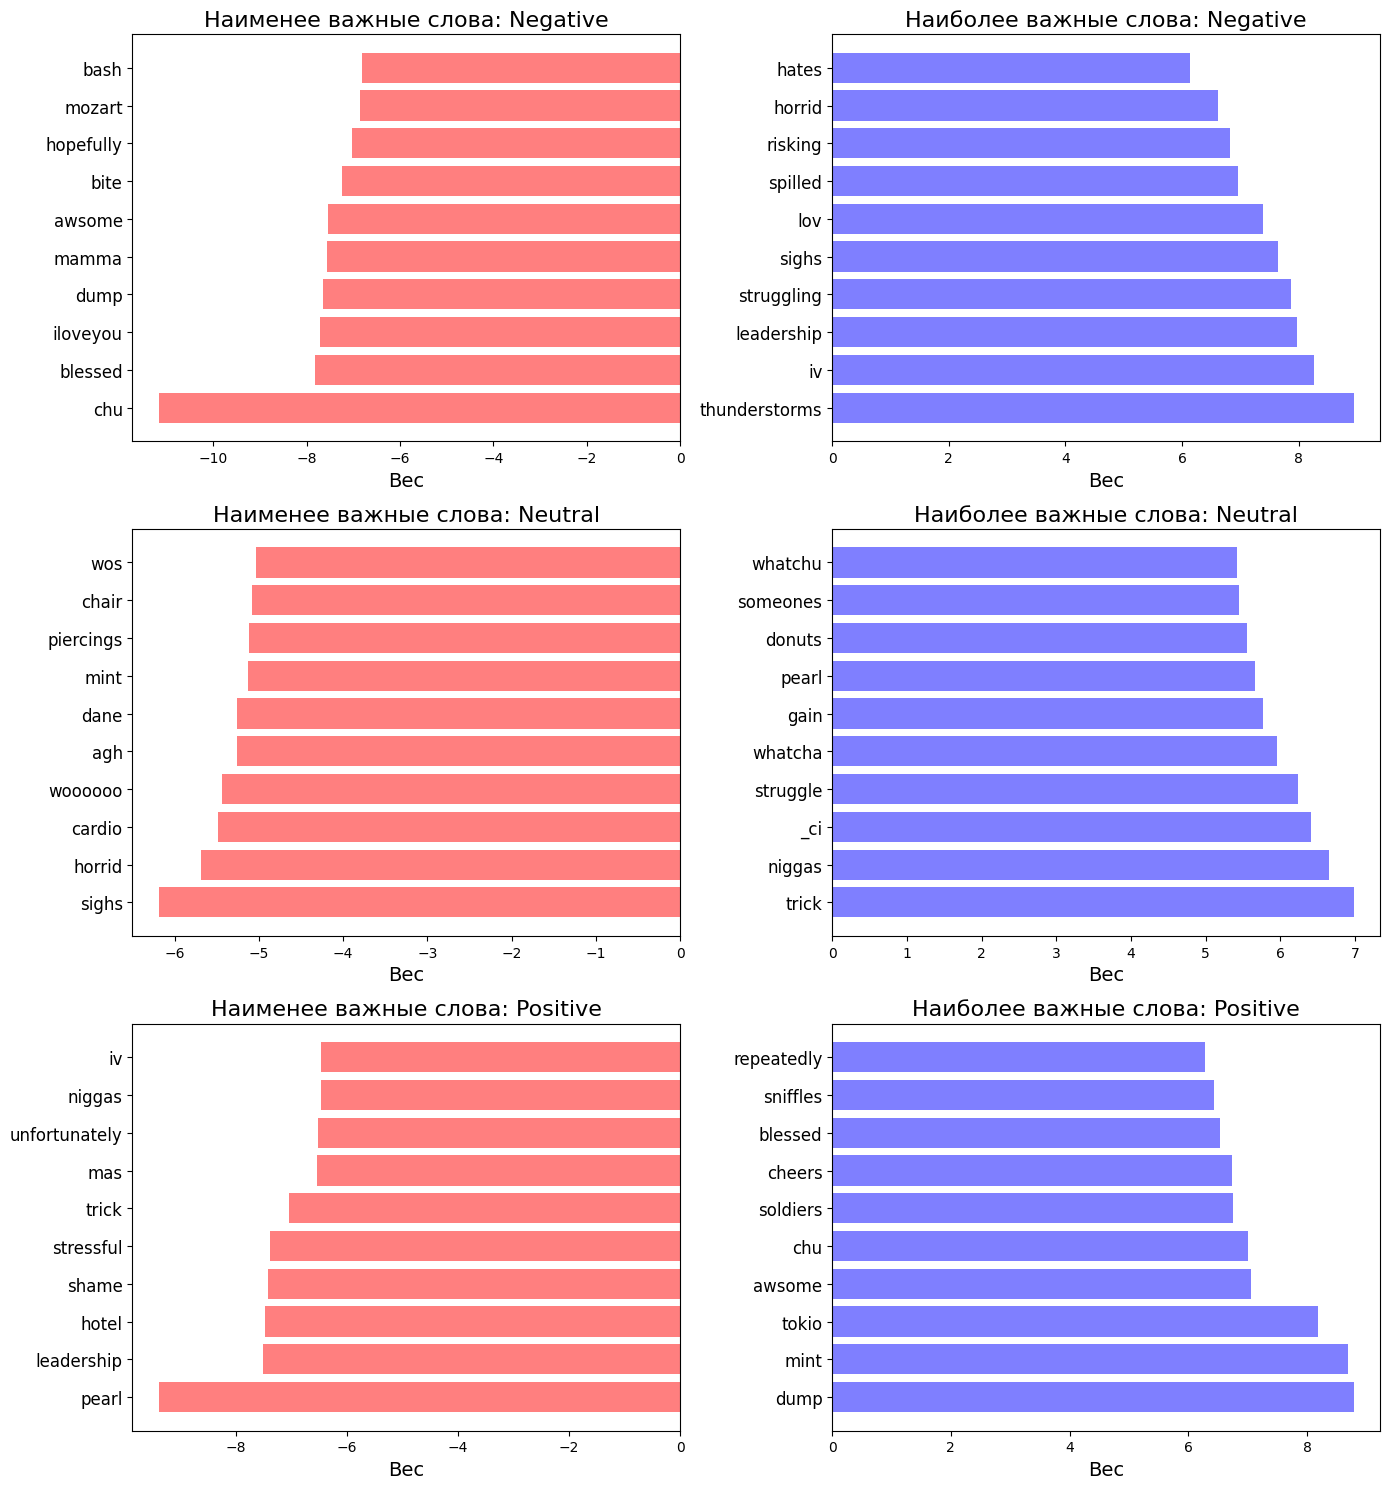

In [66]:
importance = get_most_important_features(count_vectorizer, clf, n=10)
plot_important_words_multi(importance, ["Negative", "Neutral", "Positive"])


Отображение наиболее важных слов не сказать, что улучшилось (т.е. перевычесление векторизации не сработало), поэтому было принято решение перезапустить среду выполнения и продолжить работу с CountVectorizer

In [44]:
!pip install tensorflow
!pip install keras tensorflow

In [48]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Загрузка данных
file_path = "/content/Tweets.csv"
df = pd.read_csv(file_path)

# Очистка данных
def standardize_text(df, text_field):
    def clean(text):
        text = re.sub(r"http\S+|http", "", text)  # Удаление ссылок
        text = re.sub(r"@\S+", "", text)         # Удаление упоминаний
        text = re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", text)  # Удаление лишних символов
        text = text.replace("@", "at").lower()   # Приведение текста к нижнему регистру
        return text

    df[text_field] = df[text_field].apply(lambda x: clean(str(x)))
    return df

df = standardize_text(df, "text")
df = standardize_text(df, "selected_text")
df = df.dropna()  # Удаление строк с пропущенными значениями

# Преобразование меток в числовой формат
encoder = OrdinalEncoder()
df["sentiment"] = encoder.fit_transform(df[["sentiment"]]).astype(int)

# Токенизация текста
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df["text"])
X = tokenizer.texts_to_sequences(df["text"])
X_pad = pad_sequences(X, maxlen=100)

# Подготовка меток
y = np.array(df["sentiment"])

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=40)

# Построение модели с Conv1D
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))  # Встраиваем слова
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())  # Сжимаем вектор
model.add(Dropout(0.5))  # Применяем dropout для регуляризации
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 класса для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


687/687 ━━━━━━━━━━━━━━━━━━━━ 52s 72ms/step - accuracy: 0.5388 - loss: 0.9302 - val_accuracy: 0.7282 - val_loss: 0.6506
Epoch 2/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 76s 64ms/step - accuracy: 0.7680 - loss: 0.5731 - val_accuracy: 0.7397 - val_loss: 0.6506
Epoch 3/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.8397 - loss: 0.4171 - val_accuracy: 0.7217 - val_loss: 0.6914
Epoch 4/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.8925 - loss: 0.3035 - val_accuracy: 0.7168 - val_loss: 0.7828
Epoch 5/5
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9204 - loss: 0.2246 - val_accuracy: 0.6962 - val_loss: 0.8878


In [49]:
# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Точность модели: {accuracy:.3f}")


172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6991 - loss: 0.8972
Точность модели: 0.696


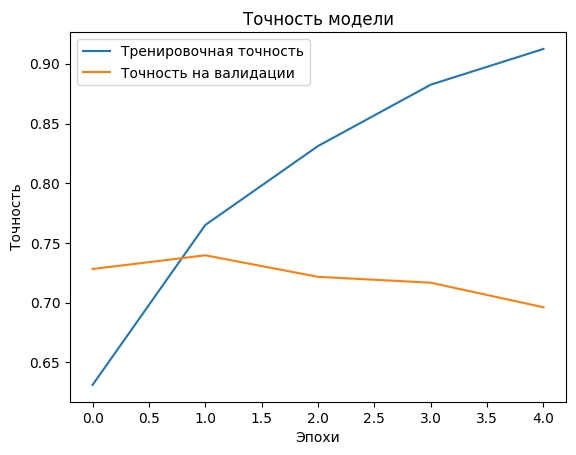

In [51]:
# Визуализация результатов обучения
plt.plot(history.history['accuracy'], label='Тренировочная точность')
plt.plot(history.history['val_accuracy'], label='Точность на валидации')
plt.title("Точность модели")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()


In [53]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Оптимизированная модель с L2 регуляризацией
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 регуляризация
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Использование ReduceLROnPlateau для динамического изменения скорости обучения
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=1e-6)

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.4394 - loss: 1.4906 - val_accuracy: 0.6709 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.6881 - loss: 0.8242 - val_accuracy: 0.7144 - val_loss: 0.7597 - learning_rate: 0.0010
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.7436 - loss: 0.7181 - val_accuracy: 0.7259 - val_loss: 0.7371 - learning_rate: 0.0010
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.7747 - loss: 0.6489 - val_accuracy: 0.7286 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 5/10
686/687 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7951 - loss: 0.6022
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.7951 - loss: 0.6022 - val_accuracy: 0.7268 - val_loss: 0.7595 - learning_rate: 0.0010
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.8243 - lo

In [54]:
# Оценка модели на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

# Вывод точности модели
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")


172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7224 - loss: 0.7802
Точность модели на тестовой выборке: 0.7271


172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step


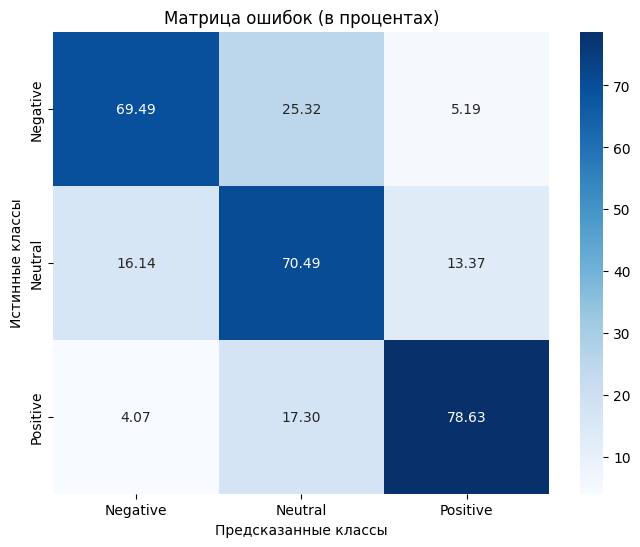

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Предсказания на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы

# Генерация матрицы ошибок
cm = confusion_matrix(y_test, y_pred_classes)

# Нормализация матрицы ошибок в проценты
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Визуализация матрицы ошибок в процентах
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Матрица ошибок (в процентах)")
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.show()
